In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
batch1 = pickle.load(open(r'.\Data\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [40]:
batch1['b1c0'].keys()

dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])

## Making the cycling csv

In [42]:
batch1['b1c0']['cycles']['1'].keys()

dict_keys(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't'])

In [46]:
for i in batch1['b1c0']['cycles'].keys():
    if int(i) > 200:
        break
#    else:
#        print(int(i))

In [47]:
batch1['b1c0']['cycles']['1'].keys()

dict_keys(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't'])

In [3]:
import pandas as pd

In [4]:
keys_of_importance = ['t', 'I','V','Qc', 'Qd', 'T']

In [5]:
cyc = np.zeros(len(batch1['b1c0']['cycles']['1']['t']))
for i in range(0,len(cyc)):
    cyc[i] = int('1')

In [33]:
directory = './Data/csv_files/'

for batt in batch1.keys():
    
    cycling_df = pd.DataFrame()
    
    for i in keys_of_importance:
        cycling_df[i] = batch1[batt]['cycles']['0'][i]
        cyc = np.zeros(len(batch1[batt]['cycles']['0']['t']))
        for i in range(0,len(cyc)):
            cyc[i] = int('0')
        
        cycling_df['Cycle_Index'] = cyc

    for cycle in batch1[batt]['cycles'].keys():
        sample_df = pd.DataFrame()
        if int(cycle) > 200:
            break
        elif int(cycle) == 0:
            pass
        else:
            for i in keys_of_importance:
                sample_df[i] = batch1[batt]['cycles'][cycle][i]
                cyc = np.zeros(len(batch1[batt]['cycles'][cycle]['t']))
                for i in range(0,len(cyc)):

                    cyc[i] = int(cycle)

                sample_df['Cycle_Index'] = cyc

        cycling_df = pd.concat([cycling_df, sample_df])
    
    summary_df = pd.DataFrame()

    for summ in batch1[batt]['summary'].keys():
        summary_df[summ] = batch1[batt]['summary'][summ]
    
    cyc_str = directory + batt + '_cycling_data.csv'
    sum_str = directory + batt + '_summary_data.csv'
    
    cycling_df.to_csv(cyc_str)
    summary_df.to_csv(sum_str)

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.016742,1.071042,1.070689,31.875011,29.566130,35.652016,13.341250,2.0
2,0.016724,1.071674,1.071900,31.931490,29.604385,35.692978,13.425777,3.0
3,0.016681,1.072304,1.072510,31.932603,29.744202,35.680588,13.425167,4.0
4,0.016662,1.072970,1.073174,31.959322,29.644709,35.728691,13.341442,5.0
5,0.016623,1.073491,1.073576,31.961062,29.752932,35.711758,13.340835,6.0
6,0.016600,1.073922,1.073992,31.900562,29.564377,35.615650,13.340198,7.0
7,0.016577,1.074158,1.074374,31.921668,29.628630,35.546783,13.425442,8.0
8,0.016588,1.074337,1.074492,31.870082,29.597345,35.539406,13.425190,9.0
9,0.016572,1.074353,1.074537,31.841053,29.687315,35.499729,13.425633,10.0


In [24]:
directory = './Data/csv_files/'
for i in batch1.keys():
    cyc_str = directory + i + '_cycling_data.csv'
    sum_str = directory + i + '_summary_data.csv'
    
    print(cyc_str, sum_str)

./Data/csv_files/b1c0_cycling_data.csv ./Data/csv_files/b1c0_summary_data.csv
./Data/csv_files/b1c1_cycling_data.csv ./Data/csv_files/b1c1_summary_data.csv
./Data/csv_files/b1c2_cycling_data.csv ./Data/csv_files/b1c2_summary_data.csv
./Data/csv_files/b1c3_cycling_data.csv ./Data/csv_files/b1c3_summary_data.csv
./Data/csv_files/b1c4_cycling_data.csv ./Data/csv_files/b1c4_summary_data.csv
./Data/csv_files/b1c5_cycling_data.csv ./Data/csv_files/b1c5_summary_data.csv
./Data/csv_files/b1c6_cycling_data.csv ./Data/csv_files/b1c6_summary_data.csv
./Data/csv_files/b1c7_cycling_data.csv ./Data/csv_files/b1c7_summary_data.csv
./Data/csv_files/b1c9_cycling_data.csv ./Data/csv_files/b1c9_summary_data.csv
./Data/csv_files/b1c11_cycling_data.csv ./Data/csv_files/b1c11_summary_data.csv
./Data/csv_files/b1c14_cycling_data.csv ./Data/csv_files/b1c14_summary_data.csv
./Data/csv_files/b1c15_cycling_data.csv ./Data/csv_files/b1c15_summary_data.csv
./Data/csv_files/b1c16_cycling_data.csv ./Data/csv_files/b

In [17]:
cycling_df.to_csv('./Data/csv_files/b1c0_cycling_data.csv')
summary_df.to_csv('./Data/csv_files/b1c0_summary_data.csv')

,t,Cycle_Index,I,V,Qc,Qd,T
0,0.000000,1.0,0.000000,2.026416,0.000000,0.000000,31.632496
1,0.002417,1.0,0.215908,2.039388,0.000001,0.000000,31.632496
2,0.002912,1.0,0.359831,2.051660,0.000001,0.000000,31.632496
3,0.003212,1.0,0.467846,2.063070,0.000001,0.000000,31.632496
4,0.003498,1.0,0.575877,2.076204,0.000001,0.000000,31.632496
5,0.003958,1.0,0.683839,2.095182,0.000001,0.000000,31.632496
6,0.004193,1.0,0.755327,2.105333,0.000001,0.000000,31.632496
7,0.004420,1.0,0.827938,2.116548,0.000001,0.000000,31.632496
8,0.004682,1.0,0.936128,2.134108,0.000001,0.000000,31.632496
9,0.004887,1.0,1.007726,2.146774,0.000001,0.000000,31.632496


,t,I,V,Qc,Qd,T
0,0.000000,0.000000,2.026416,0.000000,0.000000,31.632496
1,0.002417,0.215908,2.039388,0.000001,0.000000,31.632496
2,0.002912,0.359831,2.051660,0.000001,0.000000,31.632496
3,0.003212,0.467846,2.063070,0.000001,0.000000,31.632496
4,0.003498,0.575877,2.076204,0.000001,0.000000,31.632496
5,0.003958,0.683839,2.095182,0.000001,0.000000,31.632496
6,0.004193,0.755327,2.105333,0.000001,0.000000,31.632496
7,0.004420,0.827938,2.116548,0.000001,0.000000,31.632496
8,0.004682,0.936128,2.134108,0.000001,0.000000,31.632496
9,0.004887,1.007726,2.146774,0.000001,0.000000,31.632496


In [4]:
numBat1 = len(batch1.keys())
numBat1

41

In [38]:
batch1['b1c0']['summary']

{'IR': array([0.        , 0.01674235, 0.01672431, ..., 0.01708527, 0.01707222,
        0.0170891 ]),
 'QC': array([0.       , 1.0710422, 1.0716741, ..., 1.0263145, 1.0266199,
        1.0260537]),
 'QD': array([0.       , 1.0706892, 1.0719005, ..., 1.0264986, 1.0266768,
        1.0262098]),
 'Tavg': array([ 0.        , 31.87501078, 31.93149033, ..., 32.29614847,
        32.20877834, 32.20080358]),
 'Tmin': array([ 0.      , 29.56613 , 29.604385, ..., 29.727167, 29.654888,
        29.681129]),
 'Tmax': array([ 0.      , 35.652016, 35.692978, ..., 36.750278, 36.758877,
        36.561554]),
 'chargetime': array([ 0.        , 13.34125   , 13.42577667, ..., 13.42549833,
        13.34097167, 13.42571167]),
 'cycle': array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.187e+03, 1.188e+03,
        1.189e+03])}

In [15]:
batch1['b1c0']['cycles']['1'].keys()

dict_keys(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't'])

In [36]:
for i in batch1['b1c0']['cycles']['1'].keys():
    print(i, len(batch1['b1c0']['cycles']['1'][i]))

I 1087
Qc 1087
Qd 1087
Qdlin 1000
T 1087
Tdlin 1000
V 1087
dQdV 1000
t 1087


In [32]:
Qdlin_len = len(batch1['b1c5']['cycles']['100']['Qdlin'])

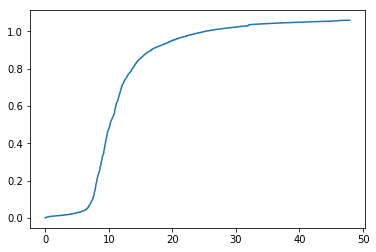

In [34]:
plt.plot(batch1['b1c5']['cycles']['100']['t'][0:int(Qdlin_len)], batch1['b1c5']['cycles']['100']['Qdlin'])

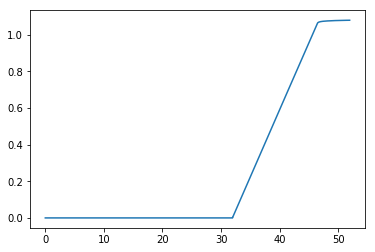

In [35]:
plt.plot(batch1['b1c5']['cycles']['100']['t'], batch1['b1c5']['cycles']['100']['Qd'])

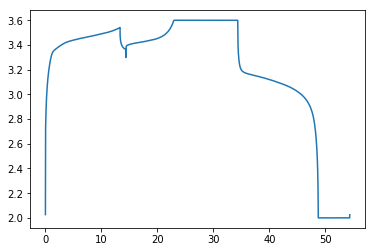

In [21]:
plt.plot(batch1['b1c0']['cycles']['1']['t'], batch1['b1c0']['cycles']['1']['V'])

In [12]:
batch1['b1c0']['cycles']['1']['V']

array([2.0264158, 2.0393877, 2.0516596, ..., 2.0124063, 2.0224609,
       2.0250397])

In [4]:
batch2 = pickle.load(open(r'.\Data\batch2.pkl','rb'))

In [5]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [6]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [7]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [8]:
numBat2 = len(batch2.keys())
numBat2

43

In [9]:
batch3 = pickle.load(open(r'.\Data\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

In [10]:
numBat3 = len(batch3.keys())
numBat3

40

In [11]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [12]:
bat_dict = {**batch1, **batch2, **batch3}

Text(0, 0.5, 'Discharge Capacity (Ah)')

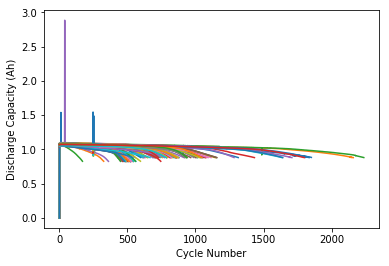

In [13]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

### Train and Test Split
If you are interested in using the same train/test split as the paper, use the indices specified below

In [14]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);